## Image Collection

### Data collection

[Convolutional  Neural  networks](https://docs.google.com/document/d/1tXQsUti1rOXf4S4ypCBW8209YQzLK8RdDdxgeTM-7Do/edit#heading=h.x8nkn5z8zt6u)

[session document](https://docs.google.com/document/d/16-4Y6gacxXmSx4j28W938aGOLMai2ede34vuoDMd3Bk/edit)

[cats vs dogs.ipynb](https://colab.research.google.com/drive/1G7aGTqBxwAih8O0MPwWOkiv6i6cHJGy3?usp=sharing#scrollTo=GkrLvhQMcjb_)

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip


--2020-07-11 12:22:15--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.20.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   205MB/s    in 0.3s    

2020-07-11 12:22:16 (205 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



main folfer

* train -- cat and dogs
* validation -- cats and dogs

In [ ]:
import os
import zipfile
local_zip = "/tmp/cats_and_dogs_filtered.zip" ## which zip file you want to extract
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp') #in which location you want to store extracted files
zip_ref.close()

In [ ]:
os.listdir("/tmp/cats_and_dogs_filtered")

['vectorize.py', 'validation', 'train']

In [ ]:
os.listdir("/tmp/cats_and_dogs_filtered/train")

['cats', 'dogs']

In [ ]:
print(len(os.listdir("/tmp/cats_and_dogs_filtered/train/dogs")))
print(len(os.listdir("/tmp/cats_and_dogs_filtered/train/cats")))

1000
1000


In [ ]:
base_dir=("/tmp/cats_and_dogs_filtered")
train_dir=os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
## Directory with training cat pictures
train_cat_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cat_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [ ]:
## File names
train_cat_filenames = os.listdir(train_cat_dir )
train_cat_filenames[:4]

['cat.617.jpg', 'cat.11.jpg', 'cat.417.jpg', 'cat.277.jpg']

In [ ]:
os.listdir()

['.config', 'sample_data']

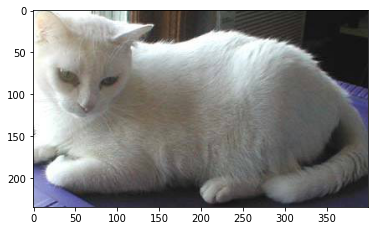

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(train_cat_dir+'/cat.955.jpg'))

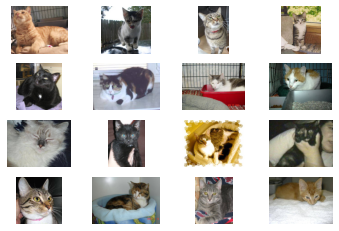

In [ ]:
import matplotlib.pyplot as plt
j=1 ##plot position
for i in range(16):
  img = plt.imread(os.path.join(train_cat_dir,train_cat_filenames[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.axis('off')
  j += 1

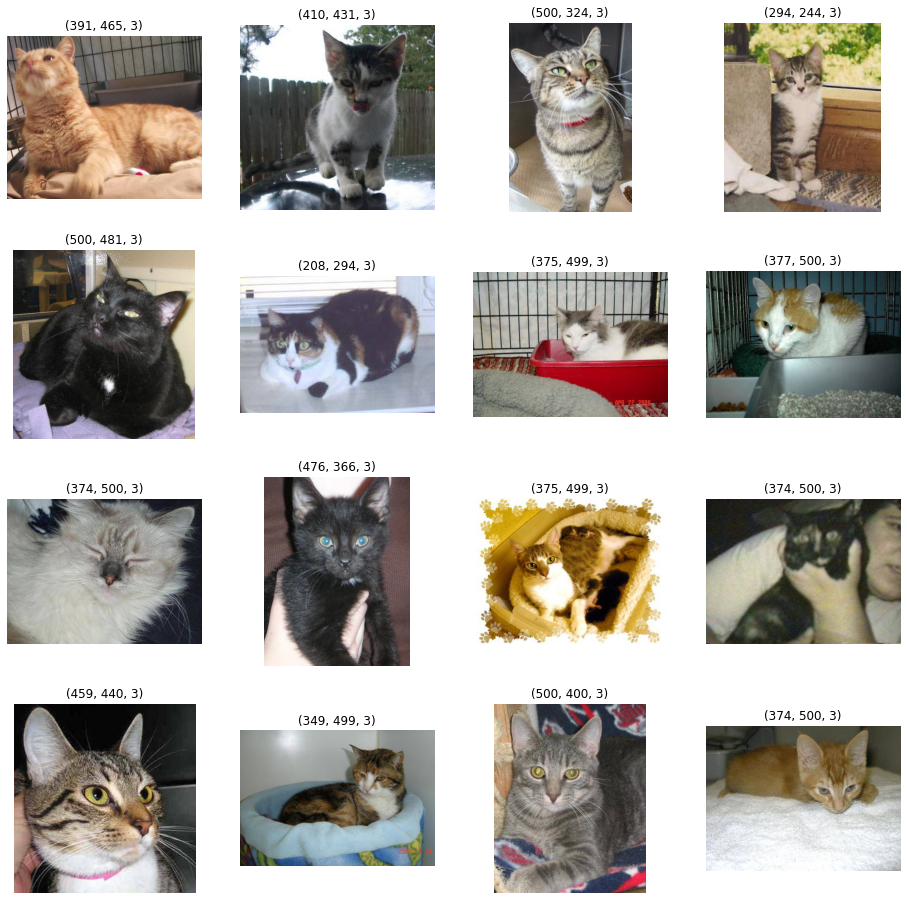

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j=1 ##plot position
for i in range(16):
  img = plt.imread(os.path.join(train_cat_dir,train_cat_filenames[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')
  j += 1

## Data preprocessing

Read the image data<br>
we have different shapes here.<br>
we need same shape for each and every image<br>
reshaping the image<br>
cats and dogs labelling<br>


### Creating Train and validation data from folder

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_generator

(20, 150, 150, 3)
(20,)


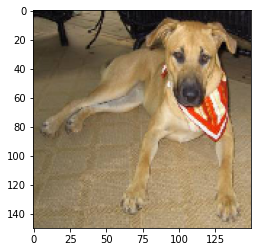

In [ ]:
imgs,labels = train_generator.next()
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])

In [ ]:
imgs,labels = train_generator.next()
#print(i)
print(imgs.shape)
print(labels.shape)
p = 1 
plt.subplot(figsize=(16,16))
for j in range(20):
  plt.subplot(4,5,p)
  plt.imshow(imgs[j,:,:,:])
  plt.title(labels[j])
  plt.axis("off")

(20, 150, 150, 3)
(20,)


AttributeError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential

In [ ]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
model = Sequential()

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(16, 3, activation='relu',input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2))

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D(2))

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
model.add(Flatten())

# Create a fully connected layer with ReLU activation and 512 hidden units
model.add(Dense(512, activation='relu'))

# Create output layer with a single node and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

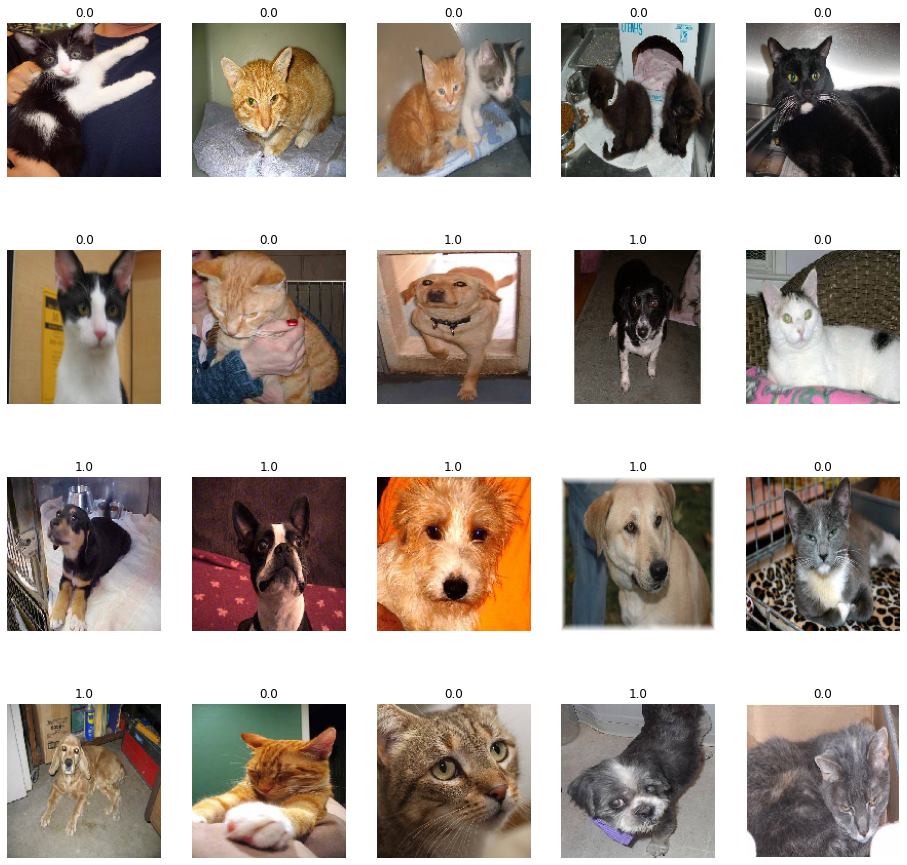

In [ ]:
plt.figure(figsize=(16,16))
pos = 1  ## plot position
for i in range(20):
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:]) # To display the image
  plt.title(labels[i])
  plt.axis('off')
  pos += 1

### Bulid the model

In [ ]:
## import required methods
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [ ]:
model = Sequential()
## add a conv layer folloed by maxpooling
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer folloed by maxpooling
model.add(Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer folloed by maxpooling
model.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
# Convert the faeturemap into 1D array
model.add(Flatten())
# Fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))
## Final output layer
model.add(Dense(1,activation='sigmoid'))

## let us see the the summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [ ]:
### Compiling the modle
model.compile(loss='BinaryCrossEntropy',metrics=['accuracy'])

In [ ]:
### Compiling the modle
import tensorflow as tf
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

### Train the model

In [ ]:
history = model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)

Epoch 1/15
100/100 [==============================] - 10s 103ms/step - loss: 0.8595 - accuracy: 0.5540 - val_loss: 0.6418 - val_accuracy: 0.5520
Epoch 2/15
100/100 [==============================] - 10s 103ms/step - loss: 0.6386 - accuracy: 0.6565 - val_loss: 0.6147 - val_accuracy: 0.6860
Epoch 3/15
100/100 [==============================] - 10s 104ms/step - loss: 0.5453 - accuracy: 0.7250 - val_loss: 0.5789 - val_accuracy: 0.6830
Epoch 4/15
100/100 [==============================] - 10s 102ms/step - loss: 0.4745 - accuracy: 0.7800 - val_loss: 0.5407 - val_accuracy: 0.7340
Epoch 5/15
100/100 [==============================] - 10s 104ms/step - loss: 0.3987 - accuracy: 0.8180 - val_loss: 0.6859 - val_accuracy: 0.6840
Epoch 6/15
100/100 [==============================] - 10s 104ms/step - loss: 0.3149 - accuracy: 0.8650 - val_loss: 0.6275 - val_accuracy: 0.7160
Epoch 7/15
100/100 [==============================] - 10s 105ms/step - loss: 0.2387 - accuracy: 0.8990 - val_loss: 0.6870 - val_ac

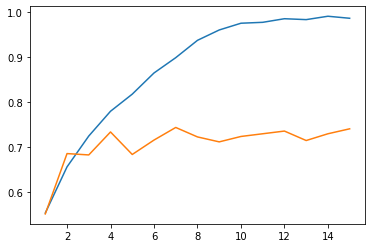

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss=history.history['val_loss']

epochs = list(range(1,16))
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')

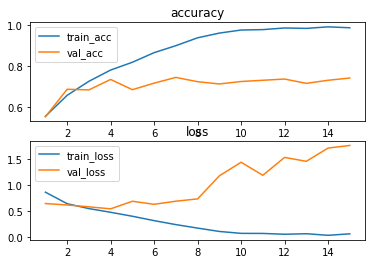

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = list(range(1,16))
plt.subplot(2,1,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()

## to predict for an image

1. read the image
2. check the shape

1. resize into required shape(1,150*150*3)
2. apply scaling


[Module: tf.keras.preprocessing.image](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image)



In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/tmp/dog.jpg')
print(type(img))
#print(img.shape)
img = tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(120, 180, 3)
<class 'numpy.ndarray'>


In [ ]:
img=tf.image.resize(img,(150,150))
print(img.shape)

(150, 150, 3)


In [ ]:
tf.keras.backend.resize_images(
    img, 150, 150, "channels_last", interpolation='nearest'
)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/tmp/dog.jpg')
print(type(img))
#print(img.shape)
img = tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img = tf.image.resize(img,(150,150))
## Scaling 
img = img/255
print(img.shape)
img = np.expand_dims(img,axis=0)
print(img.shape)


<class 'PIL.JpegImagePlugin.JpegImageFile'>
(120, 180, 3)
<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


In [ ]:
model.predict(img)

array([[0.99977225]], dtype=float32)